In [2]:
# Importing testfunctions and algorithms
import numpy as np
import matplotlib.pyplot as plt
import time

import TestFunctionsAndBoundaries.TestFunctions as tf

from Algorithms.PSO import PSO
from Algorithms.GA import GA
from Algorithms.SA import SA
from Algorithms.TS import TS 


In [129]:
# Testing functions

dim = 50
fn = tf.Elliptic
bound = tf.Elliptic_bounds
print(bound)


values = []
random_start = time.time()
for i in range(5000): 
    point = np.random.uniform(bound[0], bound[1], dim)
    values.append(fn(point))
random_time = round(time.time() - random_start, 4)
print("time: ",  random_time,  " res: ",min(values))
print("-----")
SA_start = time.time()
## L is usually number of dims and a 0.9
res_SA = fn(SA(fn, bound, dim, T = 1000, L = 50, a = 0.90, iterations = 350))
SA_time = round(time.time() - SA_start, 4)
print("time: ",  SA_time,  " res: ",res_SA)

TS_start = time.time()
res_TS = fn(TS(fn, bound, dim, m = 5, n_neighbors = 5, h0 = 0.1, iterations = 8500))
TS_time = round(time.time() - TS_start, 4)
print("time: ",  TS_time,  " res: ",res_TS)

# mute rate 0.01 good, more iterations good, lower mute rate good for 
GA_start = time.time()
res_GA = fn(GA(fn, bound, dim, n_pop = 10, x_rate = 0.5, mutation_rate = 0.2, iterations = 8000))
GA_time = round(time.time() - GA_start, 4)
print("time: ",  GA_time,  " res: ",res_GA)

# Typically v_max 1% of bounds is good, or 
PSO_start = time.time()
res_PSO = fn(PSO(fn, bound, dim, n_particles = 20, w = 0.72, c1 = 1.2, c2 = 5, v_max = 0.025, iterations = 1350))
PSO_time = round(time.time() - PSO_start, 4)
print("time: " , PSO_time, " res: ", res_PSO)



[-100, 100]
time:  0.1461  res:  1012641866.7537091
-----
time:  2.4823  res:  192189648.82871878
time:  2.6718  res:  919355463.321006
time:  7.4011  res:  13514928.259917088
time:  3.0682  res:  1414104394.0785184


In [3]:
### PARAMETERS 
function_params = [("Sphere", tf.Sphere, tf.Sphere_bounds, tf.Sphere_opt), 
                       ("Elliptic", tf.Elliptic, tf.Elliptic_bounds, tf.Elliptic_opt),
                       ("Rastrigin", tf.Rastrigin, tf.Rastrigin_bounds, tf.Rastrigin_opt),
                       ("Ackley", tf.Ackley, tf.Ackley_bounds, tf.Ackley_opt),
                       ("Schwefel_1_2", tf.Schwefel_1_2, tf.Schwefel_1_2_bounds, tf.Schwefel_1_2_opt),
                       ("Schwefel", tf.Schwefel, tf.Schwefel_bounds, tf.Schwefel_opt),
                       ("Rosenbrock", tf.Rosenbrock, tf.Rosenbrock_bounds, tf.Rosenbrock_opt),
                       ("Griewank", tf.Griewank, tf.Griewank_bounds, tf.Griewank_opt),
                       ("Sum_of_different_powers", tf.Sum_of_different_powers, tf.Sum_of_different_powers_bounds, tf.Sum_of_different_powers_opt),
                       ("Sum_squares", tf.Sum_squares, tf.Sum_squares_bounds, tf.Sum_squares_opt)]

    
algorithm_params = [("Sphere", {"T":100, "L": 50, "a": 0.90, "iterations": 400}, 
                                   {"m" : 5, "n_neighbors" : 5, "h0" : 0.05, "iterations" : 9000}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 10000}, 
                                   {"n_particles": 20, "w" : 0.72, "c1": 1.2, "c2": 4, "v_max": 0.1, "iterations": 1800}), 
                        
                       ("Elliptic", {"T":100, "L": 50, "a": 0.90, "iterations": 280}, 
                                   {"m" : 10, "n_neighbors" : 10, "h0" : 1, "iterations" : 2800}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.2, "iterations" : 2200}, 
                                   {"n_particles": 20, "w" : 0.72, "c1": 1.2, "c2": 1.2, "v_max": 1, "iterations": 900}),
                        
                       ("Rastrigin", {"T":100, "L": 50, "a": 0.90, "iterations": 160}, 
                                   {"m" : 5, "n_neighbors" : 5, "h0" : 0.05, "iterations" : 4000}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 3000}, 
                                   {"n_particles": 20, "w" : 0.72, "c1": 1.2, "c2": 3, "v_max": 1, "iterations": 400}),
                        
                       ("Ackley", {"T":100, "L": 50, "a": 0.90, "iterations": 160}, 
                                   {"m" : 5, "n_neighbors" : 5, "h0" : 0.05, "iterations" : 100}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 3000}, 
                                   {"n_particles": 40, "w" : 0.72, "c1": 1.2, "c2": 1.2, "v_max": 1, "iterations": 200}),
                        
                       ("Schwefel_1_2", {"T":100, "L": 50, "a": 0.90, "iterations": 65}, 
                                   {"m" : 5, "n_neighbors" : 5, "h0" : 1, "iterations" : 1400}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 1200}, 
                                   {"n_particles": 20, "w" : 0.72, "c1": 1.2, "c2": 1.2, "v_max": 10, "iterations": 130}),
                        
                       ("Schwefel", {"T":100, "L": 50, "a": 0.90, "iterations": 140}, 
                                   {"m" : 5, "n_neighbors" : 5, "h0" : 1, "iterations" : 3200}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 2400}, 
                                   {"n_particles": 20, "w" : 0.72, "c1": 1.2, "c2": 5, "v_max": 10, "iterations": 300}),
                        
                       ("Rosenbrock", {"T":100, "L": 50, "a": 0.90, "iterations": 200}, 
                                   {"m" : 5, "n_neighbors" : 5, "h0" : 0.1, "iterations" : 5000}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 4000}, 
                                   {"n_particles": 20, "w" : 0.72, "c1": 1.2, "c2": 5, "v_max": 1, "iterations": 550}),
                        
                       ("Griewank", {"T":100, "L": 50, "a": 0.90, "iterations": 100}, 
                                   {"m" : 5, "n_neighbors" : 5, "h0" : 1, "iterations" : 2250}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 1700}, 
                                   {"n_particles": 20, "w" : 0.72, "c1": 1.2, "c2": 5, "v_max": 10, "iterations": 230}),
                        
                       ("Sum_of_different_powers", {"T":100, "L": 50, "a": 0.90, "iterations": 380}, 
                                   {"m" : 5, "n_neighbors" : 5, "h0" : 0.01, "iterations" : 5000}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 9000}, 
                                   {"n_particles": 20, "w" : 0.72, "c1": 1.2, "c2": 1.2, "v_max": 0.01, "iterations": 1500}),
                        
                       ("Sum_squares",{"T":100, "L": 50, "a": 0.90, "iterations": 350}, 
                                   {"m" : 4, "n_neighbors" : 10, "h0" : 0.1, "iterations" : 8500}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 8000}, 
                                   {"n_particles": 20, "w" : 0.72, "c1": 1.2, "c2": 5, "v_max": 0.025, "iterations": 1350})]

In [4]:
dims = 50
runs = 10

for fp, ap in zip(function_params, algorithm_params):
    assert(fp[0] == ap[0])
    print(f"{fp[0]}, optimal value: {fp[3]} \n")
    names = ["SA", "TS", "GA", "PSO"]
    
    SA_start = time.time()
    SA(fp[1], fp[2], dims, T = ap[1]["T"], L = ap[1]["L"], a = ap[1]["a"], iterations = ap[1]["iterations"])
    SA_time = round(time.time() - SA_start,4)
    
    TS_start = time.time()
    TS(fp[1], fp[2], dims, m = ap[2]["m"], n_neighbors = ap[2]["n_neighbors"], h0 = ap[2]["h0"], iterations = ap[2]["iterations"])
    TS_time = round(time.time() - TS_start,4)
    
    GA_start = time.time()
    GA(fp[1], fp[2], dims, n_pop = ap[3]["n_pop"], x_rate = ap[3]["x_rate"], mutation_rate = ap[3]["mutation_rate"], iterations = ap[3]["iterations"])
    GA_time = round(time.time() - GA_start,4)
    
    PSO_start = time.time()
    PSO(fp[1], fp[2], dims, n_particles = ap[4]["n_particles"], w = ap[4]["w"], c1 = ap[4]["c1"], c2 = ap[4]["c2"], v_max = ap[4]["v_max"], iterations = ap[4]["iterations"])
    PSO_time = round(time.time() - PSO_start,4)
    
    print(f"SA time: {SA_time}, TS time: {TS_time}, GA time: {GA_time}, PSO time: {PSO_time}")
    
    fastest = np.argmin([SA_time, TS_time, GA_time, PSO_time])
    slowest = np.argmax([SA_time, TS_time, GA_time, PSO_time])
    
    print(f"Fastest: {names[fastest]}, slowest: {names[slowest]} \n")
    
    TS_values = []
    for i in range(runs): 
        point = TS(fp[1], fp[2], dims, m = ap[2]["m"], n_neighbors = ap[2]["n_neighbors"], h0 = ap[2]["h0"], iterations = ap[2]["iterations"])
        fit_value = fp[1](point)
        TS_values.append(fit_value)
    print(f"TS mean: {np.mean(TS_values)}, TS std: {np.std(TS_values)}, TS best: {min(TS_values)}")
    
    SA_values = []
    for i in range(runs): 
        point = SA(fp[1], fp[2], dims, T = ap[1]["T"], L = ap[1]["L"], a = ap[1]["a"], iterations = ap[1]["iterations"])
        fit_value = fp[1](point)
        SA_values.append(fit_value)
    print(f"SA mean: {np.mean(SA_values)}, SA std: {np.std(SA_values)}, SA best: {min(SA_values)}")
    
    GA_values = []
    for i in range(runs): 
        point = GA(fp[1], fp[2], dims, n_pop = ap[3]["n_pop"], x_rate = ap[3]["x_rate"], mutation_rate = ap[3]["mutation_rate"], iterations = ap[3]["iterations"])
        fit_value = fp[1](point)
        GA_values.append(fit_value)
    print(f"GA mean: {np.mean(GA_values)}, GA std: {np.std(GA_values)}, GA best: {min(GA_values)}")
    
    PSO_values = []
    for i in range(runs): 
        point = PSO(fp[1], fp[2], dims, n_particles = ap[4]["n_particles"], w = ap[4]["w"], c1 = ap[4]["c1"], c2 = ap[4]["c2"], v_max = ap[4]["v_max"], iterations = ap[4]["iterations"])
        fit_value = fp[1](point)
        PSO_values.append(fit_value)
    print(f"PSO mean: {np.mean(PSO_values)}, PSO std: {np.std(PSO_values)}, PSO best: {min(PSO_values)} \n")
    
    means = [np.mean(SA_values), np.mean(TS_values), np.mean(GA_values), np.mean(PSO_values)]
    best_vals =[min(SA_values), min(TS_values), min(GA_values), min(PSO_values)]
    best_mean = np.argmin(means) 
    best_val = np.argmin(best_vals)
    print(f"Best average: {names[best_mean]}, value: {means[best_mean]}")
    print(f"Best val: {names[best_val]}, value: {best_vals[best_val]}")
    
    np.save(f'{fp[0]}_{dims}_SA.npy', SA_values)
    np.save(f'{fp[0]}_{dims}_TS.npy', TS_values)
    np.save(f'{fp[0]}_{dims}_GA.npy', GA_values)
    np.save(f'{fp[0]}_{dims}_PSO.npy', PSO_values)
    
    print("-------------------------------------------------------------------------")


Sphere, optimal value: 0 

SA time: 1.9747, TS time: 1.8898, GA time: 2.0505, PSO time: 2.0715
Fastest: TS, slowest: PSO 

TS mean: 0.010920752425624621, TS std: 0.0009221426506131734, TS best: 0.008884709048726555
SA mean: 45.82549219141863, SA std: 5.86718640507709, SA best: 38.56477283826836
GA mean: 0.006022745000114704, GA std: 0.0019960919567981656, GA best: 0.003184739039235737
PSO mean: 0.3112817237552937, PSO std: 0.05516731021865401, PSO best: 0.1992305106158387 

Best average: GA, value: 0.006022745000114704
Best val: GA, value: 0.003184739039235737
-------------------------------------------------------------------------
Elliptic, optimal value: 0 

SA time: 1.9874, TS time: 1.9814, GA time: 2.0344, PSO time: 2.0104
Fastest: TS, slowest: GA 

TS mean: 2133229.569961945, TS std: 534090.2179298907, TS best: 1167267.006296377
SA mean: 215840806.64302126, SA std: 38766037.835950926, SA best: 159666527.61823043
GA mean: 45963604.69373779, GA std: 12842383.548185885, GA best: 243

In [80]:
a = [12,7,2]
np.save('test3.npy', a)    # .npy extension is added if not given
d = np.load('test3.npy')
d

array([12,  7,  2])

In [12]:
# Testing benchmark functions
for name, fit_func, bounds, opt in benchmark_functions:
    print("--- " + name +  " ---")
    print("PSO results: ", fit_func(PSO(fit_func, bounds, 3, iterations = 10)))
    print("Actual Optimum: ", opt)
    print("\n")

--- Sphere ---
PSO results:  0.016846225865637682
Actual Optimum:  0


--- Elliptic ---
PSO results:  2236.125944271399
Actual Optimum:  0


--- Rastrigin ---
PSO results:  5.1832265175258385
Actual Optimum:  0


--- Ackley ---
PSO results:  15.560610171416885
Actual Optimum:  0


--- Schwefel_1_2 ---
PSO results:  20.248760161696183
Actual Optimum:  0


--- Schwefel ---
PSO results:  763.9667652896701
Actual Optimum:  0


--- Rosenbrock ---
PSO results:  6.360736576417408
Actual Optimum:  0


--- Griewank ---
PSO results:  7.946359032442215
Actual Optimum:  0


--- Sum_of_different_powers ---
PSO results:  7.945399643828886e-08
Actual Optimum:  0


--- Sum_squares ---
PSO results:  0.19078641801295282
Actual Optimum:  0




In [ ]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(-5, 5.1, 0.2)
y = np.arange(-5, 5.1, 0.2)

X, Y = np.meshgrid(x, y)
Z = np.sin(X)*np.cos(Y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [20]:
# Testing visualization data output 
its = 10

data_viz_PSO = PSO(tf.Sphere, tf.Sphere_bounds, 3, iterations = its, v_max = 10, visualize = True)
#print(data_viz_PSO, "\n")

data_viz_GA = GA(tf.Sphere, tf.Sphere_bounds, 3, iterations = its, visualize = True)
#print(data_viz_GA, "\n")

data_viz_TS = TS(tf.Sphere, tf.Sphere_bounds, 3, iterations = its, visualize = True)
#print(data_viz_TS, "\n")

data_viz_SA = SA(tf.Sphere, tf.Sphere_bounds, 3, iterations = its,  visualize = True)
#print(data_viz_SA, "\n")



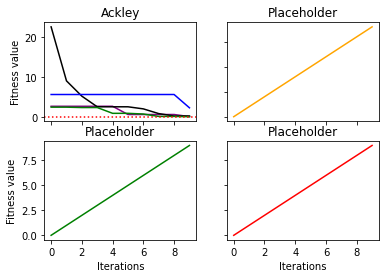

In [21]:
length = len(data_viz_PSO)
fit_values_PSO = [tf.Sphere(x) for x in data_viz_PSO]
fit_values_GA = [tf.Sphere(x) for x in data_viz_GA]
fit_values_TS = [tf.Sphere(x) for x in data_viz_TS]
fit_values_SA = [tf.Sphere(x) for x in data_viz_SA[:length]]


iterations = list(range(length))
placeholder_x = iterations
placeholder_y = iterations

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(iterations, fit_values_PSO, color = "purple")
axs[0, 0].plot(iterations, fit_values_TS, color = "black")
axs[0, 0].plot(iterations, fit_values_GA, color = "green")
axs[0, 0].plot(iterations, fit_values_SA, color = "blue")
axs[0, 0].axhline(y=0.0, color='r', linestyle='dotted')
axs[0, 0].set_title('Ackley')

axs[0, 1].plot(placeholder_x, placeholder_y, color = 'orange')
axs[0, 1].set_title('Placeholder')
axs[1, 0].plot(placeholder_x, placeholder_y, color = 'green')
axs[1, 0].set_title('Placeholder')
axs[1, 1].plot(placeholder_x, placeholder_y, color = 'red')
axs[1, 1].set_title('Placeholder')

# Set labels
for ax in axs.flat:
    ax.set(xlabel='Iterations', ylabel='Fitness value')

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()